In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [42]:
df = pd.read_excel('perola.xlsx')
df = df.drop(df.index[0])
df = df.drop(df.index[0])
df['Tempo"'] = df['Tempo"']/ 10**6
df['Acelereção'] = df['Acelereção']/ 10**6
df.head()


,"Tempo""",Acelereção
3595,359.5009,-0.05787
3596,359.6009,-0.05787
3597,359.7009,-0.05787
3598,359.8009,-0.05787
3599,359.9009,-0.004879


In [43]:
mean = df['Acelereção'].mean()
std_dev = df['Acelereção'].std()
lower_bound = mean - 1.5 * std_dev
upper_bound = mean + 1.5 * std_dev
df = df[(df['Acelereção'] >= lower_bound) & (df['Acelereção'] <= upper_bound)]

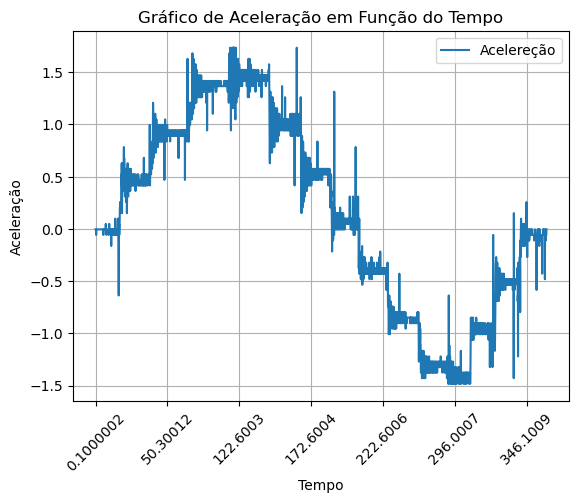

In [44]:
df.plot(x='Tempo"', y='Acelereção', kind='line')
plt.xlabel('Tempo')
plt.ylabel('Aceleração')
plt.title('Gráfico de Aceleração em Função do Tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

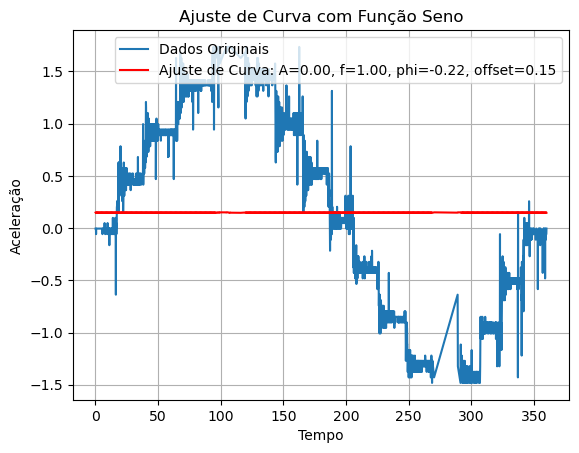

In [48]:
x = df['Tempo"'].astype(float)
y = df['Acelereção']

# Define a função seno que queremos ajustar aos dados
def sin_function(x, A, f, phi, offset):
    return A * np.sin(2 * np.pi * f * x + phi) + offset

# Ajusta a função seno aos dados
popt, pcov = curve_fit(sin_function, x, y)

# Extrai os parâmetros ajustados
A, f, phi, offset = popt

# Plota os dados originais
plt.plot(x, y, label='Dados Originais')

# Plota a função seno ajustada
plt.plot(x, sin_function(x, *popt), 'r-', label='Ajuste de Curva: A={:.2f}, f={:.2f}, phi={:.2f}, offset={:.2f}'.format(A, f, phi, offset))

plt.xlabel('Tempo')
plt.ylabel('Aceleração')
plt.title('Ajuste de Curva com Função Seno')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
df2 = pd.read_excel('perolaqcai.xlsx')
df2['Tempo"'] = df2['Tempo"']/10**6
df2['Acelereção'] = df2['Acelereção']/10**6
df2.head()

,"Tempo""",Acelereção
0,0.100000,-0.004879
1,0.200000,-0.004879
2,0.300001,-0.004879
3,0.400001,-0.004879
4,0.500001,-0.004879


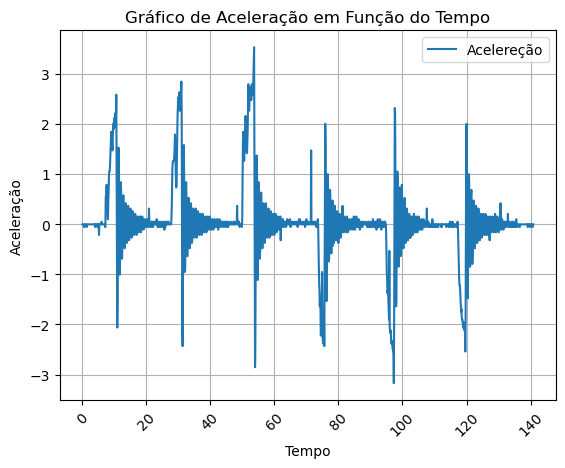

In [53]:
df2.plot(x='Tempo"', y='Acelereção', kind='line')
plt.xlabel('Tempo')
plt.ylabel('Aceleração')
plt.title('Gráfico de Aceleração em Função do Tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [59]:
df['Acelereção'] = df['Acelereção'].astype(float)
g = 10
w = 4 * 38e-3  # 4 pesos de 38g cada, convertidos para kg
d = 0.05  # distância horizontal em metros (exemplo)
Delta = 0.3  # deslocamento do modelo em kg (exemplo)
theta = np.arctan(df['Acelereção'] / g)  # cálculo simplificado para exemplo
# Calcular GM
GM = (w * d) / (Delta * np.tan(theta.mean()))

print(f'GM transversal do modelo em escala: {GM:.4f} m')

# Analisar os dados de decaimento
# Ajustar uma função exponencial aos dados de decaimento
def exp_func(t, A, delta):
    return A * np.exp(-delta * t)

# Suponha que estamos ajustando a aceleração no eixo Y
popt, pcov = curve_fit(exp_func, df2['Tempo"'], df2['Acelereção'])

# Extrair a taxa de decaimento
A, delta = popt

# Calcular a frequência natural de roll
I_zz = 0.05  # momento de inércia em kg.m^2 (exemplo)
omega_n = np.sqrt(g * GM / I_zz)

print(f'Frequência natural de roll do modelo: {omega_n:.4f} rad/s')

# Calcular o coeficiente de amortecimento
zeta = delta / (2 * omega_n)

print(f'Amortecimento do movimento de roll do modelo: {zeta:.4f}')

GM transversal do modelo em escala: 1.7178 m
Frequência natural de roll do modelo: 18.5353 rad/s
Amortecimento do movimento de roll do modelo: 0.0257
